In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
a = '..\datos_musica.csv'

In [3]:
df = pd.read_csv(a, sep = ',', encoding = 'utf8')

In [4]:
df.head()

,Unnamed: 0,archivo,zero_cr,spectral_centroid,spectral_bw,spectral_rf,croma,mfcc_1,mfcc_2,mfcc_3,...,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,BPM,auto_c,genero
0,0,01-TheMountain_02m_00s__03m_00s.mp3,6,2358.978044,2552.823890,4793.526802,0.470420,-163.372833,165.717529,-50.697205,...,3.419914,1.201207,-3.672799,1.497480,0.186496,0.511725,-5.180268,123.046875,0.772140,prog
1,1,01ANightmareToRemember_02m_00s__03m_00s.mp3,4,3100.689109,3256.578868,6469.363992,0.596201,-48.062439,135.743393,-53.932007,...,5.244628,1.330808,-2.682353,0.532447,-1.862646,1.804187,-5.636509,109.956782,0.628546,prog
2,2,01AcidRain_02m_00s__03m_00s.mp3,5,3198.378355,3543.702522,6808.570540,0.546079,-58.244419,134.549545,-35.384872,...,4.593798,1.471745,0.739590,0.728077,-4.671610,3.458641,-1.755218,143.554688,0.541958,prog
3,3,01BalrogBoogie_02m_00s__03m_00s.mp3,2,2942.011868,3163.903990,6050.917527,0.433330,-91.082634,134.391296,-46.598930,...,2.395693,1.147897,1.289821,-0.101062,-4.962541,3.051191,-2.858684,90.666118,0.541528,prog
4,4,01C'estlaVie_02m_00s__03m_00s.mp3,5,3123.743239,3337.527859,6499.844646,0.535730,-34.448353,137.779984,-48.767544,...,3.280222,3.242964,-4.131340,1.912559,-6.067165,2.728408,-6.114751,120.185320,0.746078,prog


In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from sklearn.metrics import confusion_matrix

In [6]:
df_aux = df.drop(['archivo'], axis = 1)

In [7]:
def codificar_generos(x):
    if x == 'prog':
        return 0
    elif x == 'salsa':
        return 1
    elif x == 'electronica':
        return 2

In [8]:

df_aux['target'] = df_aux['genero'].map(codificar_generos)

In [9]:

df_aux = df_aux.drop(['genero'], axis = 1)

In [10]:
vars_num = 'zero_cr spectral_centroid spectral_bw spectral_rf croma mfcc_1 mfcc_2 mfcc_3 mfcc_4 mfcc_5 mfcc_6 mfcc_7 mfcc_8 mfcc_9 mfcc_10 mfcc_11 mfcc_12 mfcc_13 mfcc_14 mfcc_15 mfcc_16 mfcc_17 mfcc_18 mfcc_19 mfcc_20 BPM auto_c'
vars_num = vars_num.split()

# Creamos una variable X que contenga todas las características y una Y que sea el 'target'
X = df_aux[vars_num].copy()
Y = df_aux['target'].copy()

In [11]:
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)

In [12]:
#dividimos el data frame 
X_train,X_test,y_train,y_test = train_test_split(Xs,Y, train_size = 0.7)
print(f'Tamaño x_train: {len(X_train)}\nTamaño y_train: {len(y_train)}\nTamaño x_test: {len(X_test)}\nTamaño y_test: {len(y_test)}')
print(f'Porcentajes: \ntrain: {(len(X_train) / 390) * 100}%\ntest: {(len(X_test) / 390) * 100}%' )

Tamaño x_train: 273
Tamaño y_train: 273
Tamaño x_test: 117
Tamaño y_test: 117
Porcentajes: 
train: 70.0%
test: 30.0%


In [17]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier()
modelo.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
print(confusion_matrix(y_true=y_train,y_pred = modelo.predict(X_train)))

[[77  4  1]
 [ 4 91  2]
 [ 2  4 88]]


In [23]:
##Matriz de confusion de entrenamiento

In [91]:
y_true =y_train
y_pred = modelo.predict(X_train)
confusion_matrix(y_true,y_pred)

array([[77,  4,  1],
       [ 4, 91,  2],
       [ 2,  4, 88]], dtype=int64)

In [41]:
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted   0   1   2
Actual               
0          87   7   1
1           8  78   2
2           5   5  80


In [42]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1         2
Actual                                 
0          0.915789  0.079545  0.011111
1          0.084211  0.886364  0.022222
2          0.052632  0.056818  0.888889


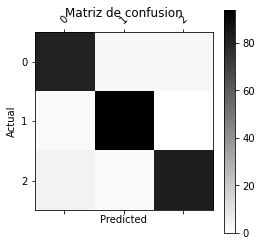

In [24]:
def plot_confusion_matrix(df_confusion, title='Matriz de confusion', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

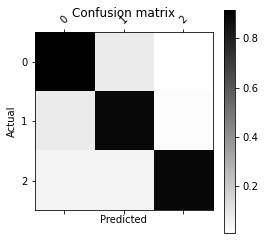

In [44]:
plot_confusion_matrix(df_conf_norm) 

In [34]:
##Matriz de confusion de prueba 

In [93]:
y_true=y_test
y_pred = modelo.predict(X_test)
print(confusion_matrix(y_true,y_pred))

[[41  7  0]
 [ 5 28  0]
 [ 3  2 31]]


In [96]:
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted   0   1   2
Actual               
0          41   7   0
1           5  28   0
2           3   2  31


In [97]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1         2
Actual                                 
0          0.854167  0.212121  0.000000
1          0.104167  0.848485  0.000000
2          0.062500  0.060606  0.861111


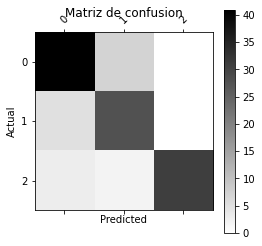

In [98]:
plot_confusion_matrix(df_confusion)

In [73]:
###Red Neuronal 

In [15]:
from sklearn.neural_network import MLPClassifier

In [26]:
def metricas(modelo,Xt,Xv,yt,yv):
    print('roc:\n')
    print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
    print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))
    print('accuracy:\n')
    print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
    print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

In [27]:
param=dict(hidden_layer_sizes = [(x,y,z,) for x in range(5,65,5) for y in range(5,65,5) for z in range(5,65,5)],
           activation = ['identity', 'logistic', 'tanh', 'relu'],
        learning_rate = ['constant', 'invscaling', 'adaptive'])

In [28]:
modelo = MLPClassifier()
modelo.fit(X_train,y_train)

c:\users\aperalta\downloads\diana\ambientemineria\mineria\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [36]:
###Matriz confusion entrenamiento

In [29]:
y_true=y_train
y_pred = modelo.predict(X_train)

In [32]:
print(confusion_matrix(y_true,y_pred))

[[80  4  3]
 [ 3 93  0]
 [ 6  3 81]]


In [33]:
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted   0   1   2
Actual               
0          80   4   3
1           3  93   0
2           6   3  81


In [34]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1         2
Actual                                 
0          0.919540  0.041667  0.033333
1          0.034483  0.968750  0.000000
2          0.068966  0.031250  0.900000


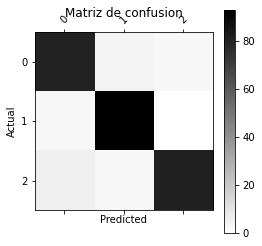

In [35]:
plot_confusion_matrix(df_confusion)

In [65]:
##Matriz de confusion de Prueba

In [68]:
y_true=y_test
y_pred = modelo.predict(X_test)

In [69]:
print(confusion_matrix(y_true,y_pred))

[[31  2  2]
 [ 5 36  1]
 [ 2  0 38]]


In [70]:
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins= False)
print(df_confusion)

Predicted   0   1   2
Actual               
0          31   2   2
1           5  36   1
2           2   0  38


In [71]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print(df_conf_norm)

Predicted         0         1      2
Actual                              
0          0.885714  0.047619  0.050
1          0.142857  0.857143  0.025
2          0.057143  0.000000  0.950


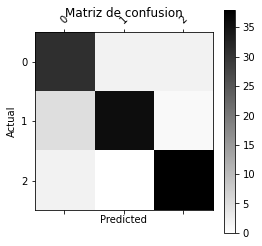

In [72]:
plot_confusion_matrix(df_confusion)